In [39]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import pandas as pd
import seaborn as sns
path =  (os.path.abspath(os.path.join(r'.', os.pardir)))
import sys
sys.path.append(path)
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from PIL import Image
import os
import os.path


Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


d:\Anaconda\envs\dataanalysis0104_env\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [40]:
# Set ground truth images from N2DH-GOWT1 dataset and N2DL-HeLa dataset to 0 and 1

def binarize(x):
    img = x.copy()

    for o in np.ndindex(img.shape):
        if img[o] > 0: 
           img[o] = 1
        else:
            img[o] = 0
    
    return img

In [41]:
# Preprocessing - Histogram stretching

def stretch(x):
    intensities = []
   
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(x, (2,  98))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
   
    img_max = max(intensities)
    img_min = min(intensities)
    img_stretch = (img-img_min)*(256 / (img_max-img_min))
    return img_stretch

In [42]:
# Load raw images from N2DH-GOWT1-dataset

img_N2DH_GOWT1 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/img")
for f in os.listdir(path):
    img_N2DH_GOWT1.append(imread(os.path.join(path , f)))


# Load ground truth images from N2DH-GOWT1-dataset

gt_N2DH_GOWT1 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DH-GOWT1/gt")
for f in os.listdir(path):
    gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

In [43]:
# Load raw images from N2DL-HeLa-dataset

img_N2DL_HeLa = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)), r"data/Otsu_data/N2DL-HeLa/img")
for f in os.listdir(path):
    img_N2DL_HeLa.append(imread(os.path.join(path , f)))


# Load ground truth images from N2Dl-HeLa-dataset

gt_N2DL_HeLa = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/N2DL-HeLa/gt")
for f in os.listdir(path):
    gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

In [44]:
# Load raw images of NIH3T3-dataset

img_NIH3T3 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/img")
for f in os.listdir(path):
    img_NIH3T3.append(imread(os.path.join(path , f)))

# Load ground truth images of NIH3T3-dataset
 
gt_NIH3T3 = []
path = os.path.join(os.path.abspath(os.path.join(r'.', os.pardir)),r"data/Otsu_data/NIH3T3/gt")
for f in os.listdir(path):
    gt_NIH3T3.append(imread(os.path.join(path , f)))

In [45]:
# Reassign the ground truth images from N2DH-GOWT1 dataset and N2DLHeLa dataset

binary_gt_N2DH_GOWT1 = []
for i in range(0,len(gt_N2DH_GOWT1)):
    binary_gt_N2DH_GOWT1.append(binarize(gt_N2DH_GOWT1[i])) 


binary_gt_N2DL_HeLa = []
for i in range(0,len(gt_N2DL_HeLa)):
    binary_gt_N2DL_HeLa.append(binarize(gt_N2DL_HeLa[i])) 

In [46]:
# Make a copy of all images of each dataset / use as "no preprocessed images"

copy_img_N2DH_GOWT1 = img_N2DH_GOWT1.copy()

copy_img_N2DL_HeLa = img_N2DL_HeLa.copy()

copy_img_NIH3T3 = img_NIH3T3.copy()


In [47]:
# Apply median filter to all images of each dataset

median_img_N2DH_GOWT1 = []
for i in range(0,len(copy_img_N2DH_GOWT1)):
    median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(copy_img_N2DH_GOWT1[i] , 5))


median_img_N2DL_HeLa = []
for i in range(0,len(copy_img_N2DL_HeLa)):
    median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(copy_img_N2DL_HeLa[i] , 5))


median_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    median_img_NIH3T3.append(scipy.ndimage.median_filter(copy_img_NIH3T3[i] , 5))


In [48]:
# Apply gaussian filter to all images of each dataset

gauss_img_N2DH_GOWT1 = []
for i in range(0,len(copy_img_N2DH_GOWT1)):
    gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1[i] , 5))


gauss_img_N2DL_HeLa = []
for i in range(0,len(copy_img_N2DL_HeLa)):
    gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa[i] , 5))


gauss_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(copy_img_NIH3T3[i] , 5))


In [49]:
# Apply histogram stretching to all images of each dataset

stretch_img_N2DH_GOWT1 = []
for i in range(0,len(copy_img_N2DH_GOWT1)):
    stretch_img_N2DH_GOWT1.append(stretch(copy_img_N2DH_GOWT1[i]))


stretch_img_N2DL_HeLa = []
for i in range(0,len(copy_img_N2DL_HeLa)):
    stretch_img_N2DL_HeLa.append(stretch(copy_img_N2DL_HeLa[i]))


stretch_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    stretch_img_NIH3T3.append(stretch(copy_img_NIH3T3[i]))


In [50]:
# Apply median filter and histogram strechting to all images of each dataset

median_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(median_img_N2DH_GOWT1)):
    median_stretch_img_N2DH_GOWT1.append(stretch(median_img_N2DH_GOWT1[i]))


median_stretch_img_N2DL_HeLa = []
for i in range(0,len(median_img_N2DL_HeLa)):
    median_stretch_img_N2DL_HeLa.append(stretch(median_img_N2DL_HeLa[i]))


median_stretch_img_NIH3T3 = []
for i in range(0,len(median_img_NIH3T3)):
    median_stretch_img_NIH3T3.append(stretch(median_img_NIH3T3[i]))


In [51]:
# Apply histogram stretching and median filter to all images of each dataset

stretch_median_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_img_N2DH_GOWT1)):
    stretch_median_img_N2DH_GOWT1.append(scipy.ndimage.median_filter(stretch_img_N2DH_GOWT1[i] , 5))


stretch_median_img_N2DL_HeLa = []
for i in range(0,len(stretch_img_N2DL_HeLa)):
    stretch_median_img_N2DL_HeLa.append(scipy.ndimage.median_filter(stretch_img_N2DL_HeLa[i] , 5))


stretch_median_img_NIH3T3 = []
for i in range(0,len(stretch_img_NIH3T3)):
    stretch_median_img_NIH3T3.append(scipy.ndimage.median_filter(stretch_img_NIH3T3[i] , 5))


In [52]:
# Apply gaussian filter and histogram strechting to all images of each dataset

gauss_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(gauss_img_N2DH_GOWT1)):
    gauss_stretch_img_N2DH_GOWT1.append(stretch(gauss_img_N2DH_GOWT1[i]))


gauss_stretch_img_N2DL_HeLa = []
for i in range(0,len(gauss_img_N2DL_HeLa)):
    gauss_stretch_img_N2DL_HeLa.append(stretch(gauss_img_N2DL_HeLa[i]))


gauss_stretch_img_NIH3T3 = []
for i in range(0,len(gauss_img_NIH3T3)):
    gauss_stretch_img_NIH3T3.append(stretch(gauss_img_NIH3T3[i]))


In [53]:
# Apply histogram stretching and gaussian filter to all images of each dataset

stretch_gauss_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_img_N2DH_GOWT1)):
    stretch_gauss_img_N2DH_GOWT1.append(scipy.ndimage.gaussian_filter(stretch_img_N2DH_GOWT1[i] , 5))


stretch_gauss_img_N2DL_HeLa = []
for i in range(0,len(stretch_img_N2DL_HeLa)):
    stretch_gauss_img_N2DL_HeLa.append(scipy.ndimage.gaussian_filter(stretch_img_N2DL_HeLa[i] , 5))


stretch_gauss_img_NIH3T3 = []
for i in range(0,len(stretch_img_NIH3T3)):
    stretch_gauss_img_NIH3T3.append(scipy.ndimage.gaussian_filter(stretch_img_NIH3T3[i] , 5))


In [54]:
# Apply otsu thresholding to all images of each dataset - no preprocessing

otsu_img_N2DH_GOWT1 = []
for i in range(0,len(copy_img_N2DH_GOWT1)):
    otsu_img_N2DH_GOWT1.append(ot.otsu_thresholding(copy_img_N2DH_GOWT1[i] , 256))

otsu_img_N2DL_HeLa = []
for i in range(0,len(copy_img_N2DL_HeLa)):
    otsu_img_N2DL_HeLa.append(ot.otsu_thresholding(copy_img_N2DL_HeLa[i] , 256))

otsu_img_NIH3T3 = []
for i in range(0,len(copy_img_NIH3T3)):
    otsu_img_NIH3T3.append(ot.otsu_thresholding(copy_img_NIH3T3[i] , 256))


In [55]:
# Apply otsu thresholding to all images of each dataset - median filter

otsu_median_img_N2DH_GOWT1 = []
for i in range(0,len(median_img_N2DH_GOWT1)):
    otsu_median_img_N2DH_GOWT1.append(ot.otsu_thresholding(median_img_N2DH_GOWT1[i] , 256))

otsu_median_img_N2DL_HeLa = []
for i in range(0,len(median_img_N2DL_HeLa)):
    otsu_median_img_N2DL_HeLa.append(ot.otsu_thresholding(median_img_N2DL_HeLa[i] , 256))

otsu_median_img_NIH3T3 = []
for i in range(0,len(median_img_NIH3T3)):
    otsu_median_img_NIH3T3.append(ot.otsu_thresholding(median_img_NIH3T3[i] , 256))


In [56]:
# Apply otsu thresholding to all images of each dataset - gaussian filter

otsu_gauss_img_N2DH_GOWT1 = []
for i in range(0,len(gauss_img_N2DH_GOWT1)):
    otsu_gauss_img_N2DH_GOWT1.append(ot.otsu_thresholding(gauss_img_N2DH_GOWT1[i] , 256))

otsu_gauss_img_N2DL_HeLa = []
for i in range(0,len(gauss_img_N2DL_HeLa)):
    otsu_gauss_img_N2DL_HeLa.append(ot.otsu_thresholding(gauss_img_N2DL_HeLa[i] , 256))

otsu_gauss_img_NIH3T3 = []
for i in range(0,len(gauss_img_NIH3T3)):
    otsu_gauss_img_NIH3T3.append(ot.otsu_thresholding(gauss_img_NIH3T3[i] , 256))



In [57]:
# Apply otsu thresholding to all images of each dataset - histogram stretching

otsu_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_img_N2DH_GOWT1)):
    otsu_stretch_img_N2DH_GOWT1.append(ot.otsu_thresholding(stretch_img_N2DH_GOWT1[i] , 256))

otsu_stretch_img_N2DL_HeLa = []
for i in range(0,len(stretch_img_N2DL_HeLa)):
    otsu_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_img_N2DL_HeLa[i] , 256))

otsu_stretch_img_NIH3T3 = []
for i in range(0,len(stretch_img_NIH3T3)):
    otsu_stretch_img_NIH3T3.append(ot.otsu_thresholding(stretch_img_NIH3T3[i] , 256))


In [58]:
# Apply otsu thresholding to all images of each dataset - median filter and histogram stretching

otsu_median_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(median_stretch_img_N2DH_GOWT1)):
    otsu_median_stretch_img_N2DH_GOWT1.append(ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1[i] , 256))

otsu_median_stretch_img_N2DL_HeLa = []
for i in range(0,len(median_stretch_img_N2DL_HeLa)):
    otsu_median_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(median_stretch_img_N2DL_HeLa[i] , 256))

otsu_median_stretch_img_NIH3T3 = []
for i in range(0,len(median_stretch_img_NIH3T3)):
    otsu_median_stretch_img_NIH3T3.append(ot.otsu_thresholding(median_stretch_img_NIH3T3[i] , 256))
    


In [59]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and median filter

otsu_stretch_median_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_median_img_N2DH_GOWT1)):
    otsu_stretch_median_img_N2DH_GOWT1.append(ot.otsu_thresholding(stretch_median_img_N2DH_GOWT1[i] , 256))

otsu_stretch_median_img_N2DL_HeLa = []
for i in range(0,len(stretch_median_img_N2DL_HeLa)):
    otsu_stretch_median_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_median_img_N2DL_HeLa[i] , 256))

otsu_stretch_median_img_NIH3T3 = []
for i in range(0,len(stretch_median_img_NIH3T3)):
    otsu_stretch_median_img_NIH3T3.append(ot.otsu_thresholding(stretch_median_img_NIH3T3[i] , 256))


In [60]:
# Apply otsu thresholding to all images of each dataset - gaussian filter and histogram stretching

otsu_gauss_stretch_img_N2DH_GOWT1 = []
for i in range(0,len(gauss_stretch_img_N2DH_GOWT1)):
    otsu_gauss_stretch_img_N2DH_GOWT1.append(ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1[i] , 256))

otsu_gauss_stretch_img_N2DL_HeLa = []
for i in range(0,len(gauss_stretch_img_N2DL_HeLa)):
    otsu_gauss_stretch_img_N2DL_HeLa.append(ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa[i] , 256))

otsu_gauss_stretch_img_NIH3T3 = []
for i in range(0,len(gauss_stretch_img_NIH3T3)):
    otsu_gauss_stretch_img_NIH3T3.append(ot.otsu_thresholding(gauss_stretch_img_NIH3T3[i] , 256))


In [61]:
# Apply otsu thresholding to all images of each dataset - histogram stretching and gaussian filter

otsu_stretch_gauss_img_N2DH_GOWT1 = []
for i in range(0,len(stretch_gauss_img_N2DH_GOWT1)):
    otsu_stretch_gauss_img_N2DH_GOWT1.append(ot.otsu_thresholding(stretch_gauss_img_N2DH_GOWT1[i] , 256))

otsu_stretch_gauss_img_N2DL_HeLa = []
for i in range(0,len(stretch_gauss_img_N2DL_HeLa)):
    otsu_stretch_gauss_img_N2DL_HeLa.append(ot.otsu_thresholding(stretch_gauss_img_N2DL_HeLa[i] , 256))

otsu_stretch_gauss_img_NIH3T3 = []
for i in range(0,len(stretch_gauss_img_NIH3T3)):
    otsu_stretch_gauss_img_NIH3T3.append(ot.otsu_thresholding(stretch_gauss_img_NIH3T3[i] , 256))


In [62]:
# Dice score - N2DH-GOWT1-dataset
## no preprocessing

dice_otsu_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_img_N2DH_GOWT1)):
    dice_otsu_img_N2DH_GOWT1.append(dsc.dice(otsu_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_img_N2DH_GOWT1)

[0.5705017182130584, 0.5321692131795032, 0.568002229254991, 0.5830196570472606, 0.6502180828858916, 0.588161094224924]


In [63]:
# Dice score - N2DH-GOWT1-dataset
## median filter

dice_otsu_median_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_median_img_N2DH_GOWT1)):
    dice_otsu_median_img_N2DH_GOWT1.append(dsc.dice(otsu_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_median_img_N2DH_GOWT1)


[0.6037089513424323, 0.5424736733429693, 0.5957841500444236, 0.6207683116695029, 0.6151315544639202, 0.6342945864207978]


In [64]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter

dice_otsu_gauss_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_gauss_img_N2DH_GOWT1)):
    dice_otsu_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_gauss_img_N2DH_GOWT1)


[0.6273319170529901, 0.5798348483797099, 0.6150179010645673, 0.656154540405443, 0.6230876619384146, 0.6038669828815451]


In [65]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching

dice_otsu_stretch_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_stretch_img_N2DH_GOWT1)):
    dice_otsu_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_stretch_img_N2DH_GOWT1)


[0.7485336744038203, 0.7456856682259045, 0.7533413921109711, 0.7545519341670447, 0.7257148934473086, 0.7358569968537705]


In [66]:
# Dice score - N2DH-GOWT1-dataset
## median filter and histogram stretching

dice_otsu_median_stretch_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_median_stretch_img_N2DH_GOWT1)):
    dice_otsu_median_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_median_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_median_stretch_img_N2DH_GOWT1)


[0.781564834619796, 0.7626557104768565, 0.7992834513758729, 0.7686207507938299, 0.7380473108982586, 0.7384640370287663]


In [67]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and median filter

dice_otsu_stretch_median_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_stretch_median_img_N2DH_GOWT1)):
    dice_otsu_stretch_median_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_median_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))


In [68]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter and histogram stretching

dice_otsu_gauss_stretch_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_gauss_stretch_img_N2DH_GOWT1)):
    dice_otsu_gauss_stretch_img_N2DH_GOWT1.append(dsc.dice(otsu_gauss_stretch_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_gauss_stretch_img_N2DH_GOWT1)


[0.7257736440849029, 0.7715760393058612, 0.7817189190935375, 0.771347006351687, 0.7799930737644091, 0.7179335268677054]


In [69]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching and gaussian filter

dice_otsu_stretch_gauss_img_N2DH_GOWT1 = []
for j in range(0,len(otsu_stretch_gauss_img_N2DH_GOWT1)):
    dice_otsu_stretch_gauss_img_N2DH_GOWT1.append(dsc.dice(otsu_stretch_gauss_img_N2DH_GOWT1[j] , binary_gt_N2DH_GOWT1[j]))

print(dice_otsu_stretch_gauss_img_N2DH_GOWT1)


[0.8074235775978507, 0.7972288747275695, 0.804717201966308, 0.7938856930784932, 0.810673040572676, 0.7784159040706847]


C:\Users\marie\AppData\Local\Temp\ipykernel_19600\2518043555.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


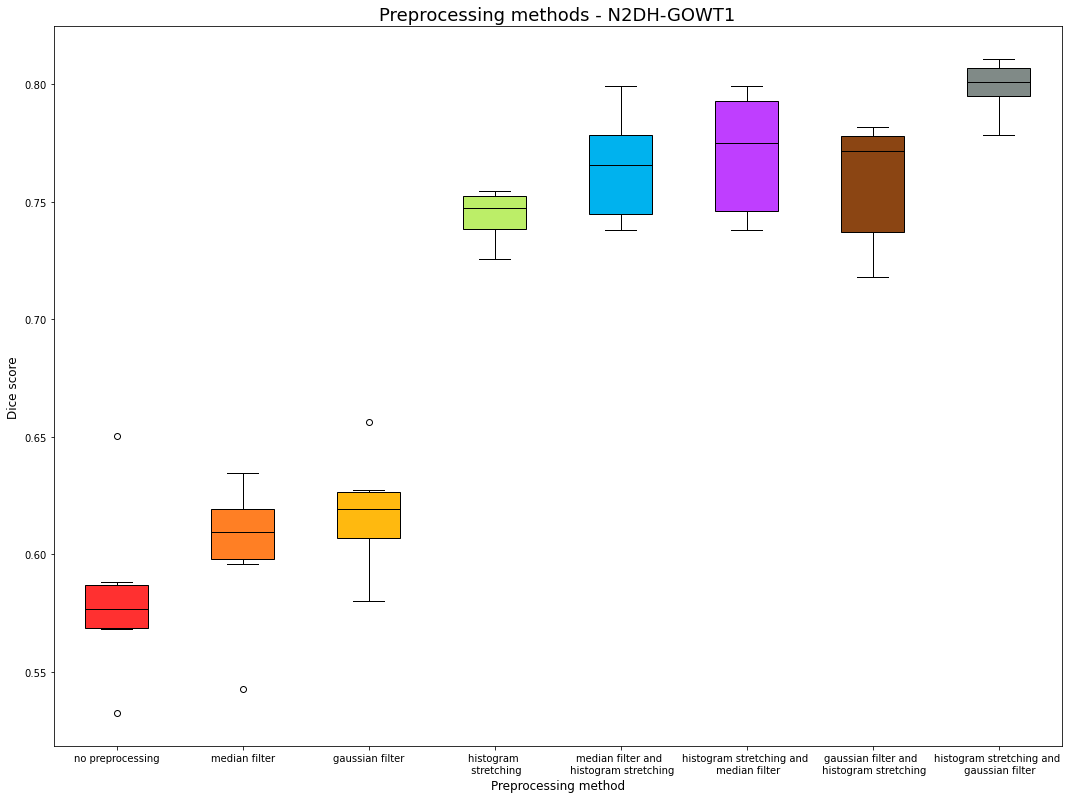

In [70]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot - matplotlib

data_N2DH_GOWT1 = [dice_otsu_img_N2DH_GOWT1 , dice_otsu_median_img_N2DH_GOWT1 , dice_otsu_gauss_img_N2DH_GOWT1 , dice_otsu_stretch_img_N2DH_GOWT1 , dice_otsu_median_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_median_img_N2DH_GOWT1 , dice_otsu_gauss_stretch_img_N2DH_GOWT1 , dice_otsu_stretch_gauss_img_N2DH_GOWT1]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DH-GOWT1' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DH_GOWT1, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)



In [71]:
# Dice score - N2DLHeLa-dataset
## no preprocessing

dice_otsu_img_N2DL_HeLa = []
for j in range(0,len(otsu_img_N2DL_HeLa)):
    dice_otsu_img_N2DL_HeLa.append(dsc.dice(otsu_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_img_N2DL_HeLa)



[0.6961222399023476, 0.65534219596258, 0.7806862514268343, 0.7806012094816297]


In [72]:
# Dice score - N2DLHeLa-dataset
## median filter

dice_otsu_median_img_N2DL_HeLa = []
for j in range(0,len(otsu_median_img_N2DL_HeLa)):
    dice_otsu_median_img_N2DL_HeLa.append(dsc.dice(otsu_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_median_img_N2DL_HeLa)


[0.6891183757591703, 0.6607444463067779, 0.7814894725094859, 0.7790908261014244]


In [73]:
# Dice score - N2DLHeLa-dataset
## gaussian filter

dice_otsu_gauss_img_N2DL_HeLa = []
for j in range(0,len(otsu_gauss_img_N2DL_HeLa)):
    dice_otsu_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_gauss_img_N2DL_HeLa)


[0.7353255276596571, 0.684857480808034, 0.7528828655295244, 0.7545053427697168]


In [74]:
# Dice score - N2DLHeLa-dataset
## histogram stretching

dice_otsu_stretch_img_N2DL_HeLa = []
for j in range(0,len(otsu_stretch_img_N2DL_HeLa)):
    dice_otsu_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_stretch_img_N2DL_HeLa)


[0.809730635140136, 0.8146261556413248, 0.7972511209448173, 0.795759151830366]


In [75]:
# Dice score - N2DLHeLa-dataset
## median filter and histogram stretching

dice_otsu_median_stretch_img_N2DL_HeLa = []
for j in range(0,len(otsu_median_stretch_img_N2DL_HeLa)):
    dice_otsu_median_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_median_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_median_stretch_img_N2DL_HeLa)


[0.8079542571668326, 0.8118430825324661, 0.797903810535371, 0.7967217574250979]


In [76]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and median filter 

dice_otsu_stretch_median_img_N2DL_HeLa = []
for j in range(0,len(otsu_stretch_median_img_N2DL_HeLa)):
    dice_otsu_stretch_median_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_median_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_stretch_median_img_N2DL_HeLa)



[0.80531181447822, 0.8069988915782569, 0.7936725302238652, 0.7930247150277129]


In [77]:
# Dice score - N2DLHeLa-dataset
## gaussian filter and histogram stretching

dice_otsu_gauss_stretch_img_N2DL_HeLa = []
for j in range(0,len(otsu_gauss_stretch_img_N2DL_HeLa)):
    dice_otsu_gauss_stretch_img_N2DL_HeLa.append(dsc.dice(otsu_gauss_stretch_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_gauss_stretch_img_N2DL_HeLa)


[0.7198842201118772, 0.7503948838463613, 0.7694831326744034, 0.7680709706376164]


In [78]:
# Dice score - N2DLHeLa-dataset
## histogram stretching and gaussian filter 

dice_otsu_stretch_gauss_img_N2DL_HeLa = []
for j in range(0,len(otsu_stretch_gauss_img_N2DL_HeLa)):
    dice_otsu_stretch_gauss_img_N2DL_HeLa.append(dsc.dice(otsu_stretch_gauss_img_N2DL_HeLa[j] , binary_gt_N2DL_HeLa[j]))

print(dice_otsu_stretch_gauss_img_N2DL_HeLa)


[0.7630122568159441, 0.7788726313264572, 0.7771252120838505, 0.7786150041220116]


C:\Users\marie\AppData\Local\Temp\ipykernel_19600\4203348270.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


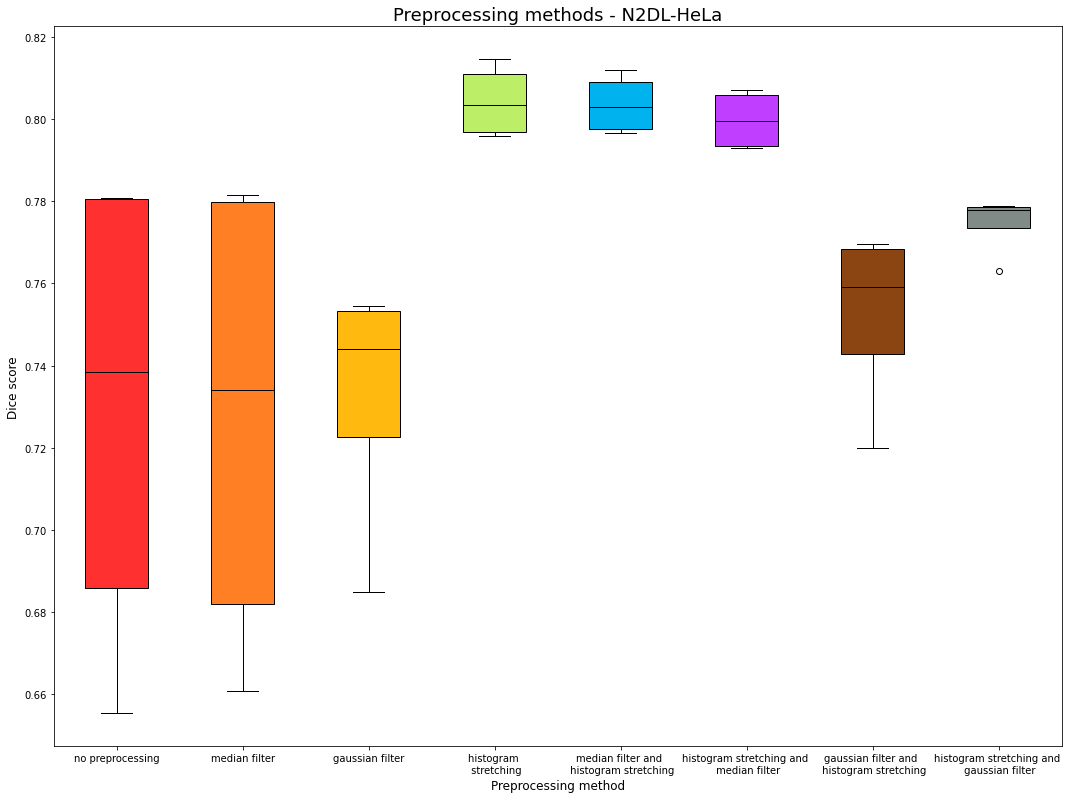

In [79]:
# Dice score - preprocessing - N2DLHeLa-dataset - boxplot

data_N2DLHeLa = [dice_otsu_img_N2DL_HeLa , dice_otsu_median_img_N2DL_HeLa , dice_otsu_gauss_img_N2DL_HeLa , dice_otsu_stretch_img_N2DL_HeLa , dice_otsu_median_stretch_img_N2DL_HeLa , dice_otsu_stretch_median_img_N2DL_HeLa , dice_otsu_gauss_stretch_img_N2DL_HeLa , dice_otsu_stretch_gauss_img_N2DL_HeLa]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - N2DL-HeLa' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_N2DLHeLa, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

In [80]:
# Dice score - NIH3T3-dataset
## no preprocessing

dice_otsu_img_NIH3T3 = []
for j in range(0,len(otsu_img_NIH3T3)):
    dice_otsu_img_NIH3T3.append(dsc.dice(otsu_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_img_NIH3T3)


[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]


In [81]:
# Dice score - N2DLHeLa-dataset
## median filter

dice_otsu_median_img_NIH3T3 = []
for j in range(0,len(otsu_median_img_NIH3T3)):
    dice_otsu_median_img_NIH3T3.append(dsc.dice(otsu_median_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_median_img_NIH3T3)


[0.8946808298799254, 0.8849869001333296, 0.8300675280378401, 0.7357748411841214, 0.7529539648467392, 0.6170388301551231, 0.6099779516517357, 0.6973465117594204, 0.03084486966478485, 0.4631152690677724, 0.0, 0.6824470203713232, 0.00014050370578524009, 0.5739847098266359, 0.6282657339684911, 0.06504850709187047, 0.0682745069747111, 0.7978706098963664]


In [82]:
# Dice score - NIH3T3-dataset
## gaussian filter

dice_otsu_gauss_img_NIH3T3 = []
for j in range(0,len(otsu_gauss_img_NIH3T3)):
    dice_otsu_gauss_img_NIH3T3.append(dsc.dice(otsu_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_gauss_img_NIH3T3)


[0.9082523752671016, 0.8932649125192117, 0.8208764032672039, 0.7371588919071718, 0.7507718679691837, 0.6606204786655497, 0.654503146981438, 0.7239110450042866, 0.03142585690272601, 0.4513501308445844, 0.0, 0.6764291468715086, 0.00024496830722525276, 0.5780641819580601, 0.6075115822469912, 0.05041662344846662, 0.07566175730533096, 0.7836327416656241]


In [83]:
# Dice score - NIH3T3-dataset
## histogram stretching

dice_otsu_stretch_img_NIH3T3 = []
for j in range(0,len(otsu_stretch_img_NIH3T3)):
    dice_otsu_stretch_img_NIH3T3.append(dsc.dice(otsu_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_stretch_img_NIH3T3)


[0.9128436675562167, 0.8845252721173281, 0.8248360803970239, 0.758336987687637, 0.7713626482081649, 0.7238225870669582, 0.6814227277548294, 0.750270864797426, 0.15958982821109705, 0.6201720440183929, 0.6454109779570866, 0.680536637820677, 0.5594608126656365, 0.5970450004221428, 0.6165448260228947, 0.594356565444854, 0.714806990589591, 0.7925039681767514]


In [84]:
# Dice score - NIH3T3-dataset
## median filter and histogram stretching

dice_otsu_median_stretch_img_NIH3T3 = []
for j in range(0,len(otsu_median_stretch_img_NIH3T3)):
    dice_otsu_median_stretch_img_NIH3T3.append(dsc.dice(otsu_median_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_median_stretch_img_NIH3T3)


[0.9126064899014071, 0.8849869001333296, 0.8300675280378401, 0.7593498927123763, 0.7715177523362349, 0.7258770509442753, 0.6876649043248704, 0.7542425610642468, 0.1710989927813985, 0.6201253474708661, 0.6457822491803156, 0.6824470203713232, 0.5608004693361966, 0.5962434107588243, 0.6148696080827027, 0.5940741781631523, 0.7154374219483178, 0.7934323834146368]


In [85]:
# Dice score - NIH3T3-dataset
## histogram stretching and median filter

dice_otsu_stretch_median_img_NIH3T3 = []
for j in range(0,len(otsu_stretch_median_img_NIH3T3)):
    dice_otsu_stretch_median_img_NIH3T3.append(dsc.dice(otsu_stretch_median_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_stretch_median_img_NIH3T3)


[0.9126064899014071, 0.8849869001333296, 0.8300675280378401, 0.7593498927123763, 0.7715177523362349, 0.7258770509442753, 0.6876649043248704, 0.7542425610642468, 0.15580528032494306, 0.6195514990251372, 0.6457822491803156, 0.6824470203713232, 0.5608004693361966, 0.5962434107588243, 0.6148696080827027, 0.5940741781631523, 0.7154374219483178, 0.7934323834146368]


In [86]:
# Dice score - NIH3T3-dataset
## gaussian filter and histogram stretching

dice_otsu_gauss_stretch_img_NIH3T3 = []
for j in range(0,len(otsu_gauss_stretch_img_NIH3T3)):
    dice_otsu_gauss_stretch_img_NIH3T3.append(dsc.dice(otsu_gauss_stretch_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_gauss_stretch_img_NIH3T3)


[0.9144616372614532, 0.9012129102994586, 0.8208926208002388, 0.7623218241256927, 0.769759320362861, 0.7218020077118498, 0.6739639291188563, 0.7436767997218661, 0.14872482957589342, 0.6020135479460568, 0.6342239605142415, 0.6747674412958218, 0.5441153533579057, 0.5857851627385573, 0.6070616637604315, 0.5960368014148862, 0.7172582975381304, 0.779165408133814]


In [87]:
# Dice score - NIH3T3-dataset
## histogram stretching and gaussian filter

dice_otsu_stretch_gauss_img_NIH3T3 = []
for j in range(0,len(otsu_stretch_gauss_img_NIH3T3)):
    dice_otsu_stretch_gauss_img_NIH3T3.append(dsc.dice(otsu_stretch_gauss_img_NIH3T3[j] , gt_NIH3T3[j]))

print(dice_otsu_stretch_gauss_img_NIH3T3)


[0.9173269061846883, 0.905840399829995, 0.8209912500213584, 0.76344829966294, 0.7709654792702151, 0.7213560551124003, 0.6738111435468639, 0.7429169576226832, 0.15264271130075435, 0.6018626738382516, 0.637507454097537, 0.6749254312021787, 0.5345029515567399, 0.5854017726380195, 0.6067217750103363, 0.5973615216604272, 0.7225942167816346, 0.7803179854891965]


C:\Users\marie\AppData\Local\Temp\ipykernel_19600\2182695053.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])


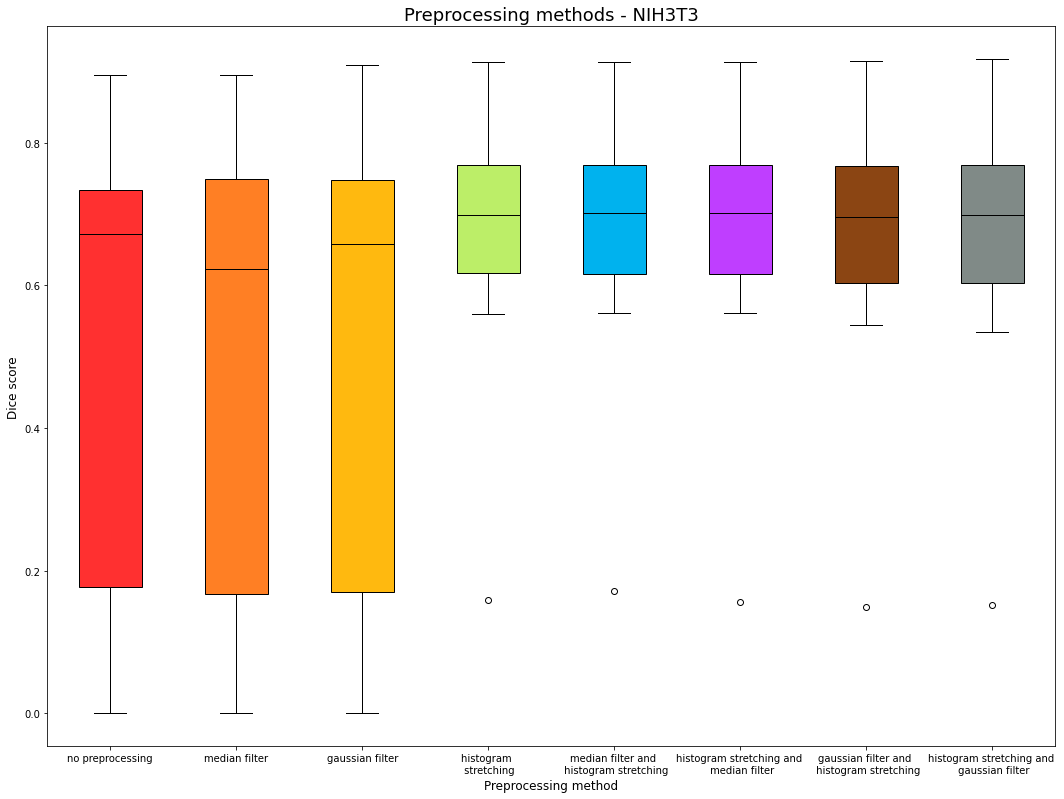

In [88]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot

data_NIH3T3 = [dice_otsu_img_NIH3T3 , dice_otsu_median_img_NIH3T3 , dice_otsu_gauss_img_NIH3T3 , dice_otsu_stretch_img_NIH3T3 , dice_otsu_median_stretch_img_NIH3T3 , dice_otsu_stretch_median_img_NIH3T3 , dice_otsu_gauss_stretch_img_NIH3T3 , dice_otsu_stretch_gauss_img_NIH3T3]

fig_1 = plt.figure(figsize = (14 , 10))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram \n stretching' , 'median filter and \n histogram stretching' , 'histogram stretching and \n median filter' , 'gaussian filter and \n histogram stretching' , 'histogram stretching and \n gaussian filter'])
plt.title('Preprocessing methods - NIH3T3' , size = 18)
plt.ylabel('Dice score' , size = 12)
plt.xlabel('Preprocessing method' , size = 12)
bp = ax.boxplot(data_NIH3T3, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF' , '#8B4513' , '#808A87']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)